# Classification using Logistic Regression

In [1]:
import os
import boto3

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
s3 = boto3.client("s3")

filename = "user_visit_duration.csv"
s3.download_file("sagemaker-ml-bucket-harini-2022", "training-data/user_visit_duration.csv", filename)
df = pd.read_csv(filename)

In [3]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (min)  100 non-null    float64
 1   Buy         100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


<AxesSubplot:title={'center':'Time vs Buy'}, xlabel='Time (min)', ylabel='Buy'>

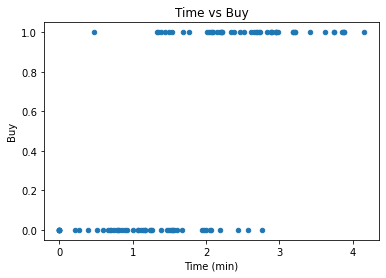

In [5]:
df.plot.scatter(x="Time (min)",
                y="Buy",
                title="Time vs Buy")

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(1,),activation='sigmoid'))
model.compile(SGD(lr=0.05),'binary_crossentropy',metrics=['accuracy'])

In [8]:
X = df['Time (min)'].values
y = df['Buy'].values
model.fit(X,y,epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.5700
Epoch 2/25
100/100 [==============================] - 0s 589us/step - loss: 0.6263 - accuracy: 0.5700
Epoch 3/25
100/100 [==============================] - 0s 365us/step - loss: 0.6155 - accuracy: 0.5800
Epoch 4/25
100/100 [==============================] - 0s 218us/step - loss: 0.6096 - accuracy: 0.5900
Epoch 5/25
100/100 [==============================] - 0s 600us/step - loss: 0.6022 - accuracy: 0.5900
Epoch 6/25
100/100 [==============================] - 0s 315us/step - loss: 0.5995 - accuracy: 0.6000
Epoch 7/25
100/100 [==============================] - 0s 254us/step - loss: 0.5968 - accuracy: 0.5900
Epoch 8/25
100/100 [==============================] - 0s 283us/step - loss: 0.5938 - accuracy: 0.5900
Epoch 9/25
100/100 [==============================] - 0s 215us/step - loss: 0.5890 - accuracy: 0.6100
Epoch 10/25
100/100 [==============================] - 0s 165us/step - loss: 0.5849 

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


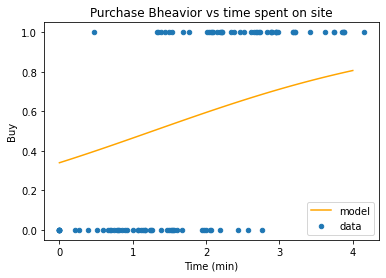

In [10]:
ax = df.plot.scatter(x="Time (min)",
                     y="Buy",
                     title="Purchase Bheavior vs time spent on site")

temp = np.linspace(0,4)
ax.plot(temp,model.predict(temp), color="orange")
plt.legend(['model','data'])

In [11]:
temp_class = model.predict(temp) > 0.5

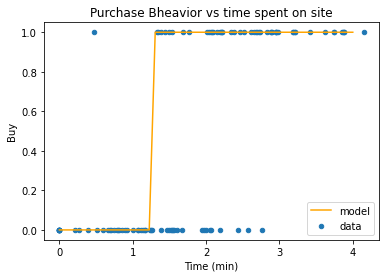

In [12]:
ax = df.plot.scatter(x="Time (min)",
                     y="Buy",
                     title="Purchase Bheavior vs time spent on site")

temp = np.linspace(0,4)
ax.plot(temp,temp_class, color="orange")
plt.legend(['model','data'])

In [13]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y,y_class_pred)))

The accuracy score is 0.810


# Train/Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [19]:
model.predict(X)

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
      

In [20]:
y

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [21]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y.ravel(),(model.predict(X)>0.5).astype(int))))

The accuracy score is 0.500


In [22]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [23]:
print("The accuracy score on Train set is {:0.3f}".format(accuracy_score(y_train,(model.predict(X_train)>0.5).astype(int))))

The accuracy score on Train set is 0.700


In [24]:
print("The accuracy score on Train set is {:0.3f}".format(accuracy_score(y_test,(model.predict(X_test)>0.5).astype(int))))

The accuracy score on Train set is 0.800


# Cross Validation

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier

In [30]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,),activation='sigmoid'))
    model.compile(SGD(lr=0.5),'binary_crossentropy',metrics=['accuracy'])
    return model

In [31]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                       epochs=25)

In [32]:
from sklearn.model_selection import cross_val_score, KFold

In [33]:
cv = KFold(3, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

Epoch 1/25
66/66 [==============================] - 0s 7ms/step - loss: 0.6285 - accuracy: 0.5758
Epoch 2/25
66/66 [==============================] - 0s 378us/step - loss: 0.6038 - accuracy: 0.6061
Epoch 3/25
66/66 [==============================] - 0s 432us/step - loss: 0.5858 - accuracy: 0.6061
Epoch 4/25
66/66 [==============================] - 0s 231us/step - loss: 0.6143 - accuracy: 0.5909
Epoch 5/25
66/66 [==============================] - 0s 224us/step - loss: 0.5577 - accuracy: 0.6818
Epoch 6/25
66/66 [==============================] - 0s 310us/step - loss: 0.5854 - accuracy: 0.6061
Epoch 7/25
66/66 [==============================] - 0s 273us/step - loss: 0.5918 - accuracy: 0.6364
Epoch 8/25
66/66 [==============================] - 0s 335us/step - loss: 0.5498 - accuracy: 0.7121
Epoch 9/25
66/66 [==============================] - ETA: 0s - loss: 0.5382 - accuracy: 0.62 - 0s 510us/step - loss: 0.5634 - accuracy: 0.6667
Epoch 10/25
66/66 [==============================] - 0s 258u

In [34]:
scores

array([0.88235295, 0.69696969, 0.87878788])

In [35]:
print("The cross validation accuracy is\t{:0.3f} ".format(scores.mean()))

The cross validation accuracy is	0.819


# Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y, y_class_pred)

array([[32, 18],
       [ 1, 49]])

In [39]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False","True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted'+ l for l in labels]
    df = pd.DataFrame(cm,index=labels, columns=pred_labels)
    return df

In [40]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy','Buy'])

,PredictedNot Buy,PredictedBuy
Not Buy,32,18
Buy,1,49


In [41]:
from sklearn.metrics import precision_score,recall_score, f1_score

In [42]:
print("Precision\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:\t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision	0.731
Recall:	0.980
F1 Score:	0.838


In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y,y_class_pred))

              precision    recall  f1-score   support

           0       0.97      0.64      0.77        50
           1       0.73      0.98      0.84        50

    accuracy                           0.81       100
   macro avg       0.85      0.81      0.80       100
weighted avg       0.85      0.81      0.80       100

